In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [263]:
X = 2 * np.random.rand(10000,1)

In [264]:
y = 4 +3 * X+np.random.randn(10000,1)

In [265]:
X_b=np.c_[np.ones(len(X)),X]

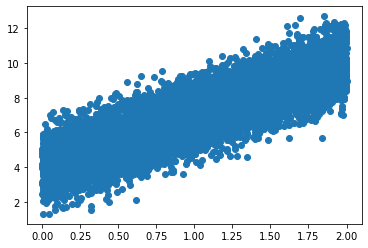

In [266]:
plt.scatter(X,y)

In [247]:
#initializing theta
theta=np.random.randn(2,1)

In [248]:
def cost(theta,feature,y):
    '''
    theta: weights, they are randomly initialized
    X: features
    y: target 
    '''
    m=len(y)
    predictions = feature.dot(theta)
    cost=.5*m*(np.sum(np.square(predictions-y)))
    return cost

In [249]:
def gradient_descent(X,y,theta,learning_rate,iterations):
    m=y.shape[0]
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for epoch in range(iterations):
        y_hat=X.dot(theta)
        theta=theta-(1/m)*learning_rate*(X.T.dot((y_hat-y)))
        theta_history[epoch,:] =theta.T
        cost_history[epoch]  = cost(theta,X,y)
    return theta,cost_history,theta_history

In [250]:
gradient_descent(X_b,y,theta,lr,n_iter)

(array([[4.0181811 ],
        [2.98991419]]),
 array([23383044.47034204, 22423163.52544611, 21503637.76105399, ...,
          502010.96911042,   502010.6421156 ,   502010.31615564]),
 array([[0.3662868 , 0.02077226],
        [0.43174089, 0.09437687],
        [0.49582421, 0.16639991],
        ...,
        [4.01809463, 2.98998898],
        [4.0181379 , 2.98995155],
        [4.0181811 , 2.98991419]]))

In [251]:
theta

array([[ 0.29943221],
       [-0.05444828]])

In [252]:
%%time
lr =0.01
n_iter = 2000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]

theta,cost_history,theta_history = gradient_descent(X_b,y,theta,.01,n_iter)




Wall time: 59.5 ms


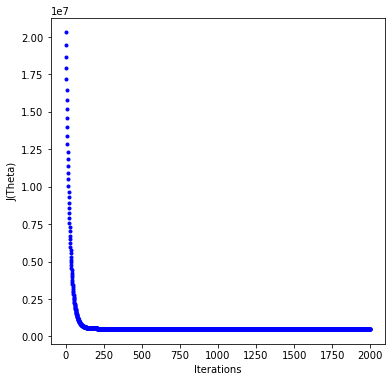

In [253]:
fig,ax = plt.subplots(figsize=(6,6))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

In [254]:
def plot_GD(n_iter,lr,ax,ax1=None):
    """
    n_iter = no of iterations
    lr = Learning Rate
    ax = Axis to plot the Gradient Descent
    ax1 = Axis to plot cost_history vs Iterations plot

    """
    ax.plot(X,y,'b.')
    theta = np.random.randn(2,1)

    tr =0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
    if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

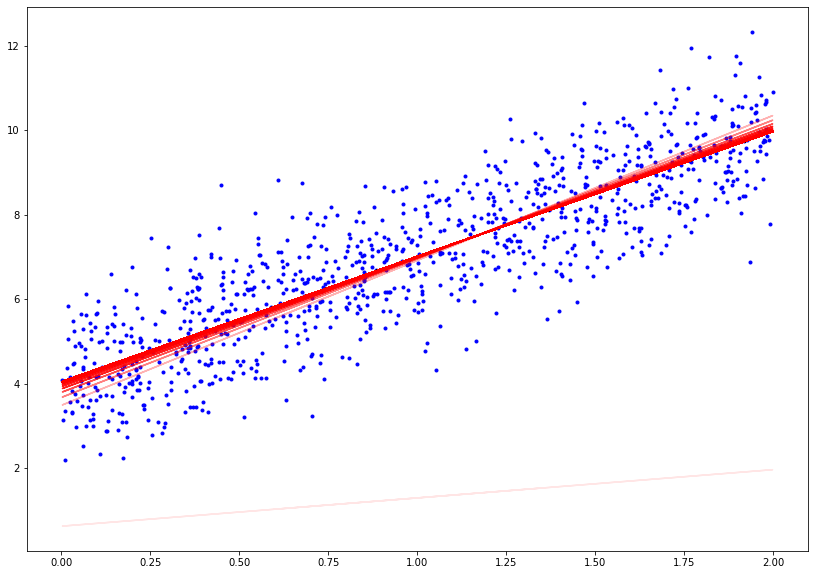

In [255]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(10000,.1,ax)

# Stochastic Gradiend Descent

In [256]:
def stochastic_gradient_descent(theta, X,y,iterations:int, learning_rate:float):
    m=y.shape[0]
    cost_history=np.zeros(iterations)
    for j in range(iterations):
        epoch_cost=0
        for i in range(m):
            rand_index=np.random.randint(0,m)
            X_i=X[rand_index,:].reshape(1,X.shape[1])
            y_i=y[rand_index].reshape(1,1)
            prediction=np.dot(X_i,theta)
            theta=theta-(1/m)*learning_rate*(X_i.T.dot(prediction-y_i))
            epoch_cost+=cost(theta,X_i,y_i)
        cost_history[j]=epoch_cost
    return theta,cost_history

In [271]:
lr =0.01
n_iter = 2000

theta = np.random.randn(2,1)

In [ ]:
%%time
theta, hist=stochastic_gradient_descent(theta, X_b,y,1000, lr)

In [140]:
len(set(np.random.choice(np.arange(0,100),size=50,replace=False)))

50

In [ ]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(1000),hist)

# Minibatch gradient descent

In [203]:
def mini_batch_gradient_descent(X,y,theta,learning_rate,iterations,batch_size):
    m=y.shape[0]
    cost_history=np.zeros(iterations)
    batches=m/batch_size
    for epoch in range(iterations):
        epoch_cost=0
        indices=np.random.permutation(m)
        X=X[indices]
        y=y[indices]
        for i in range(0,m,batch_size):
            x_i=X[i:i+batch_size]
            y_i=y[i:i+batch_size]
            x_i=np.c_[np.ones(x_i.shape[0]),x_i]
            
            y_i_hat=np.dot(x_i,theta)
            theta=theta-(1/m)*learning_rate*(x_i.T.dot(y_i_hat-y_i))
            
            epoch_cost+=cost(theta,x_i,y_i)
            
        cost_history[epoch]=epoch_cost
    return theta,cost_history

In [267]:
%%time
theta,mini=mini_batch_gradient_descent(X,y,theta,.01,1000,20)

Wall time: 27.1 s


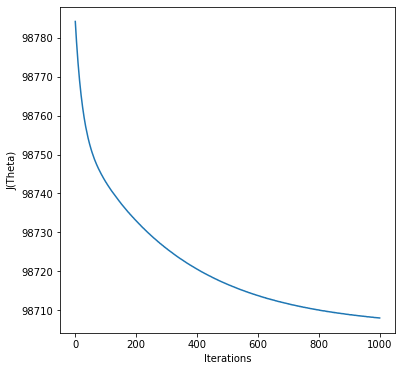

In [268]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(1000),mini)

In [181]:
mini

array([32809.67481477, 31429.51287281, 30109.12063559, 28847.26231779,
       27642.23854715, 26488.11937631, 25385.15018086, 24330.92488556,
       23321.88912125, 22358.48475825, 21436.06872349, 20552.94672951,
       19710.23916432, 18903.15979304, 18133.13898945, 17396.12443998,
       16691.39322741, 16017.12851695, 15373.22167275, 14756.52586137,
       14166.939252  , 13603.9832749 , 13065.12360792, 12549.28619779,
       12057.77165273, 11587.17545828, 11135.20936046, 10705.29655406,
       10293.33749743,  9899.24816431,  9522.85670653,  9162.59175669,
        8818.66117158,  8489.48662367,  8173.70102326,  7873.42084986,
        7584.75407094,  7310.32470349,  7046.9933508 ,  6795.35899555,
        6554.60042821,  6324.72277795,  6104.57645642,  5894.03255456,
        5692.34687994,  5500.30339293,  5315.3818884 ,  5140.08834513,
        4971.67666425,  4810.45852806,  4656.95140658,  4509.5205309 ,
        4369.14874961,  4234.85341129,  4105.93491226,  3982.82629121,
      